In [1]:
import numpy as np
import pandas as pd
import csv
import pickle

from InitData import *
from DecisionTrees import *
from Evaluation import *
from OnlineEvaluation import *

## init train dataset

In [2]:
#load dataset
train_set = InitRatingsData25M()
#rename colums
train_set = train_set.rename(columns={'userId': 'user', 'movieId': 'item'})

Dataset ratings.csv loaded


## init acquired data

In [3]:
stage1, stage2, test = getOnlineEvalDatasets('Results_online_eval.csv','binary_tree.pkl')

## find predictions stage 1 and analyze

### No ratingtranslation

In [4]:
predSeen,zeroRUSeen,avgSeen = getBinaryPredsStage1Seen(train_set,stage1,test)

BLAS using multiple threads - can cause oversubscription
found 1 potential runtime problems - see https://boi.st/lkpy-perf


In [5]:
print(len(zeroRUSeen))
print(avgSeen)
print(getMAE(predSeen))
print(getModifiedMAE(predSeen,stage1,zeroRUSeen))
print(getRMSE(predSeen))
print(getModifiedRMSE(predSeen,stage1,zeroRUSeen))

5
5.477611940298507
0.6971443354304374
0.8254935380029165
0.879501340577608
0.9814382804631316


## find predictions stage 2 and analyze

In [5]:
pred2, zeroRU2, avg2 = getBinaryPredStage2(train_set,stage2,test)

In [6]:
print(len(zeroRU2))
print(avg2)
print(getMAE(pred2))
print(getModifiedMAE(pred2,stage2,zeroRU2))
print(getRMSE(pred2))
print(getModifiedRMSE(pred2,stage2,zeroRU2))

0
8.626865671641792
0.6698899396664064
0.6698899396664064
0.8928332293927044
0.8928332293927045


## find predictions stage 1 and analyze

### Apply rating transformation on unseen movies

In [9]:
#find predictions for different strengths of translation
preds = []
intervals = [i/10 for i in range(10)]
for strength in intervals:
    df = transformDataset(stage1,strength)
    pred,_,_ = getBinaryPredStage1(train_set,df,test)
    preds.append(pred)
    print(strength)

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [10]:
#get all the maes and rmses in lists
maes = []
rmses = []
for p in preds:
    maes.append(getMAE(p))
    rmses.append(getRMSE(p))

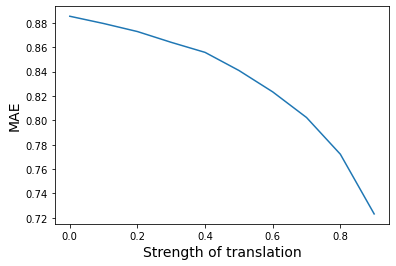

In [11]:
#plot mae
x = [i/10 for i in range(10)]
y = maes

plt.plot(x,y)
plt.xlabel('Strength of translation',fontsize = 14)
plt.ylabel('MAE',fontsize = 14)
plt.savefig('figs/binary/MAE_binary.png')
plt.show()

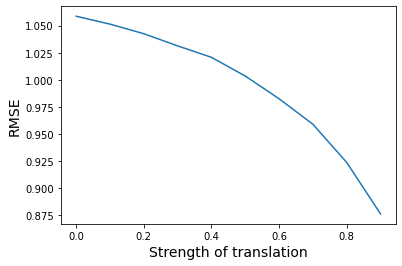

In [12]:
#plot mae
x = [i/10 for i in range(10)]
y = rmses

plt.plot(x,y)
plt.xlabel('Strength of translation',fontsize = 14)
plt.ylabel('RMSE',fontsize = 14)
plt.savefig('figs/binary/RMSE_binary.png')
plt.show()

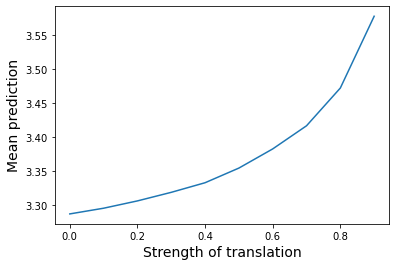

In [13]:
means = [np.mean(p['prediction'].to_numpy()) for p in preds]

#plot avgs
x = [i/10 for i in range(10)]
y = means

plt.plot(x,y)
plt.xlabel('Strength of translation',fontsize = 14)
plt.ylabel('Mean prediction',fontsize = 14)
plt.savefig('figs/binary/preds_binary.png')
plt.show()

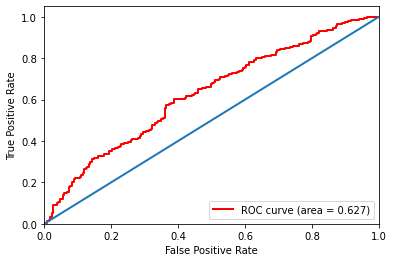

0.627

In [14]:
#get roc using no transformation
getROC(preds[0],train_set)

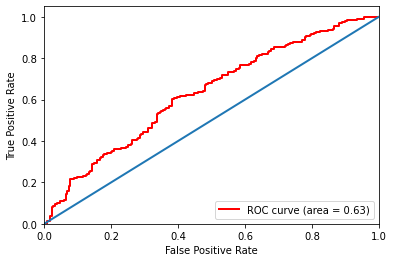

0.63

In [16]:
#get roc using middle transformation
getROC(preds[4],train_set)

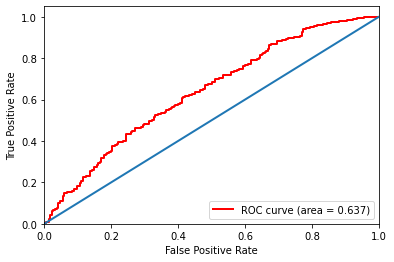

0.637

In [17]:
#get roc using full transformation
getROC(preds[-1],train_set)

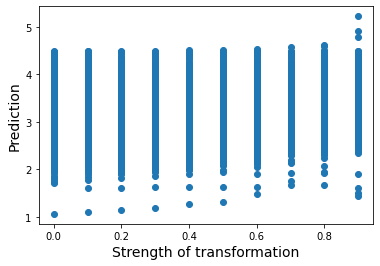

In [18]:
#visualize predictions
x = []
y = []
strengths = [i/10 for i in range(21)]
for i,p in enumerate(preds):
    pr = p['prediction'].to_numpy()
    st = strengths[i]
    for i in pr:
        x.append(st)
        y.append(i)


# Plotting code
plt.scatter(x, y)
plt.xlabel('Strength of transformation',fontsize='14')
plt.ylabel('Prediction',fontsize='14')
# Display the plot
plt.savefig('figs/binary/origRatings')
plt.show()

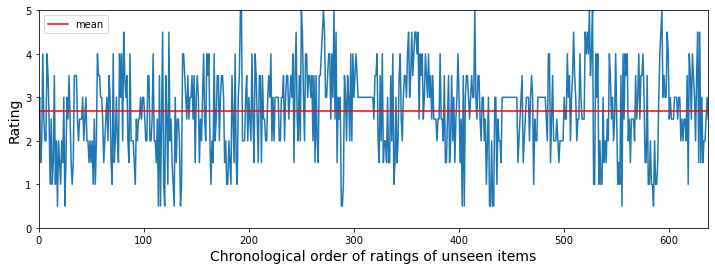

In [19]:
#rating distribution no transformation
y = stage1[stage1['seen']==False]['rating'].to_numpy()

x = [i for i in range(len(y))]

plt.figure(figsize=(12, 4))  # Adjust the width and height as per your requirement
# Plotting code
plt.plot(x, y)
plt.xlabel('X-axis')
plt.axhline(y=np.mean(y), color='r',label='mean')
plt.xticks(np.arange(0, len(y), step=100))
plt.yticks([0,1,2,3,4,5])
plt.xlabel('Chronological order of ratings of unseen items',fontsize='14')
plt.ylabel('Rating',fontsize='14')
plt.xlim(0, len(y) - 1)
plt.ylim(0, 5)
plt.legend(loc='upper left')
# Display the plot
plt.savefig('figs/binary/origRatings')
plt.show()

<Figure size 1080x216 with 0 Axes>

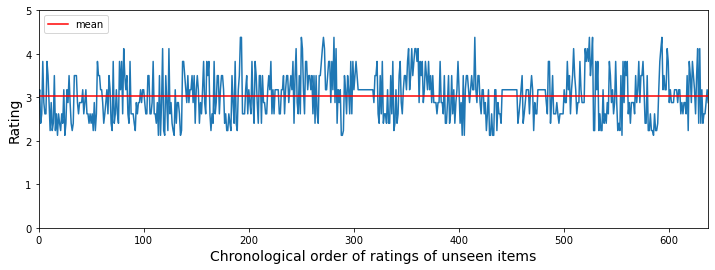

In [29]:
#rating distribution with transformation
df = transformDataset(stage1,0.8)
y = df[df['seen']==False]['rating'].to_numpy()
x = [i for i in range(len(y))]
plt.figure(figsize=(15, 3))  # Adjust the width and height as per your requirement

plt.figure(figsize=(12, 4))  # Adjust the width and height as per your requirement
# Plotting code
plt.plot(x, y)
plt.xlabel('X-axis')
plt.axhline(y=np.mean(y), color='r',label='mean')
plt.xticks(np.arange(0, len(y), step=100))
plt.yticks([0,1,2,3,4,5])
plt.xlabel('Chronological order of ratings of unseen items',fontsize='14')
plt.ylabel('Rating',fontsize='14')
plt.xlim(0, len(y) - 1)
plt.ylim(0, 5)
plt.legend(loc='upper left')
plt.savefig('figs/binary/tRatings')
plt.show()